In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import os
import matplotlib.pyplot as plt

In [19]:
from datasets import BiosensorDataset


In [22]:
data80 = BiosensorDataset(path = 'data/', biosensor_length=128, mask_size=80, mask_type=np.int8)
data_loader80 = DataLoader(data80, batch_size=1, shuffle=False)

torch.Size([1, 128, 80, 80])
torch.Size([1, 80, 80])
tensor([  0,   7,   8,  11,  13,  14,  15,  16,  17,  19,  21,  22,  26,  27,
         28,  30,  31,  32,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49,  52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  63,  65,  67,
         68,  70,  71,  72,  73,  75,  76,  77,  78,  80,  81,  82,  83,  84,
         89,  90,  91,  94,  97,  98,  99, 100, 101, 103, 106, 114, 117, 118,
        119, 120], dtype=torch.uint8)
72


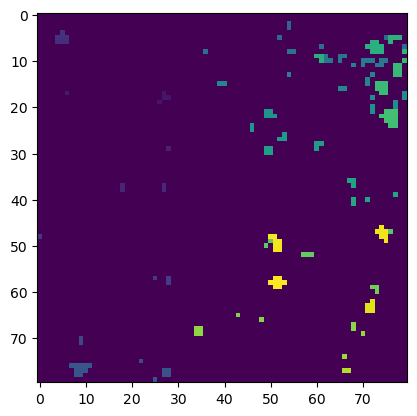

In [23]:
for bio, mask in data_loader80:
    print(bio.shape)
    print(mask.shape)
    plt.imshow(mask[0])
    print(mask[0].unique())
    print(len(mask[0].unique()))
    break